In [82]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import pickle as pkl
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [83]:
train_filepath = "train_workspace/"
animalList = ["Human","Pig","Chicken","Rat","Mouse","Dog"]
levelList = ["Strict","Relaxed","Intermediate"]
dataList = ["Ohnologs","No-Ohnologs","Paralogs"]
dataNameList = ["ohnologs","no-ohnologs","paralog"]
sb.set_style("darkgrid")

In [84]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7388253252854481288
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 119341056
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7933851592848934727
physical_device_desc: "device: 0, name: TITAN Xp, pci bus id: 0000:02:00.0, compute capability: 6.1"
]


In [85]:
working_level = "Strict"

In [86]:
def get_df_dict(level):
    df_dict = {}    
    current_file_path = train_filepath + level + "/"
    for (dataName,data) in zip(dataNameList,dataList):                
        df_dict[data] = pd.read_pickle(current_file_path + dataName + "-complete2.pkl")        
    return df_dict

In [87]:
df_dict = get_df_dict(working_level)

In [88]:
df_dict["Paralogs"].isnull().values.any()

False

In [89]:
for dataName in dataList:
    df_dict[dataName].fillna(0,inplace=True)

In [90]:
print(df_dict["Ohnologs"].isnull().values.any())
print(df_dict["No-Ohnologs"].isnull().values.any())
print(df_dict["Paralogs"].isnull().values.any())

False
False
False


Text(0.5, 1.0, 'Ohnologs')

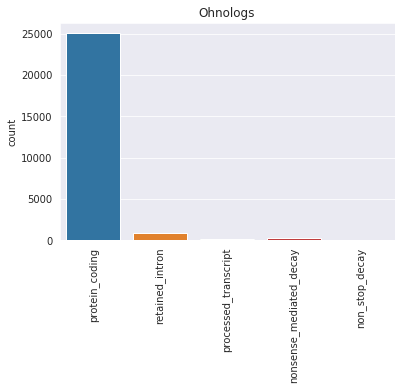

In [91]:
data = "Ohnologs"
ser = df_dict[data]["Sequence-1-Transcript-Biotype"].append(df_dict[data]["Sequence-2-Transcript-Biotype"])
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [92]:
filter_ids_1 = df_dict[data]["Sequence-1-Transcript-Biotype"] != "protein_coding"
filter_ids_2 = df_dict[data]["Sequence-2-Transcript-Biotype"] != "protein_coding"

df_dict[data].loc[filter_ids_1,"Sequence-1-Transcript-Biotype"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Transcript-Biotype"] = "Other"

Text(0.5, 1.0, 'Ohnologs')

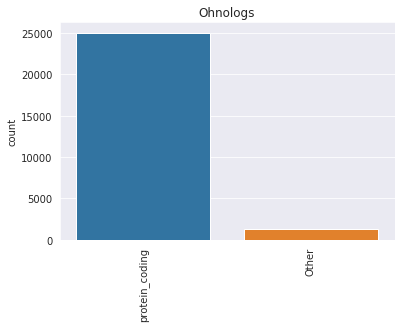

In [93]:
ser = df_dict[data]["Sequence-1-Transcript-Biotype"].append(df_dict[data]["Sequence-2-Transcript-Biotype"])
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [94]:
data = "No-Ohnologs"
filter_ids_1 = df_dict[data]["Sequence-1-Transcript-Biotype"] != "protein_coding"
filter_ids_2 = df_dict[data]["Sequence-2-Transcript-Biotype"] != "protein_coding"

df_dict[data].loc[filter_ids_1,"Sequence-1-Transcript-Biotype"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Transcript-Biotype"] = "Other"

Text(0.5, 1.0, 'No-Ohnologs')

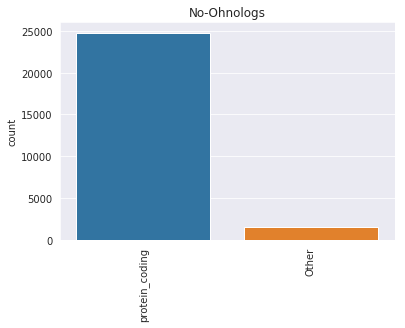

In [95]:
ser = df_dict[data]["Sequence-1-Transcript-Biotype"].append(df_dict[data]["Sequence-2-Transcript-Biotype"])
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [96]:
data = "Paralogs"
filter_ids_1 = df_dict[data]["Sequence-1-Transcript-Biotype"] != "protein_coding"
filter_ids_2 = df_dict[data]["Sequence-2-Transcript-Biotype"] != "protein_coding"

df_dict[data].loc[filter_ids_1,"Sequence-1-Transcript-Biotype"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Transcript-Biotype"] = "Other"

Text(0.5, 1.0, 'Paralogs')

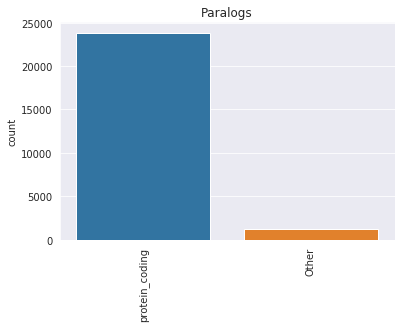

In [97]:
ser = df_dict[data]["Sequence-1-Transcript-Biotype"].append(df_dict[data]["Sequence-2-Transcript-Biotype"])
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)


Text(0.5, 1.0, 'Ohnologs')

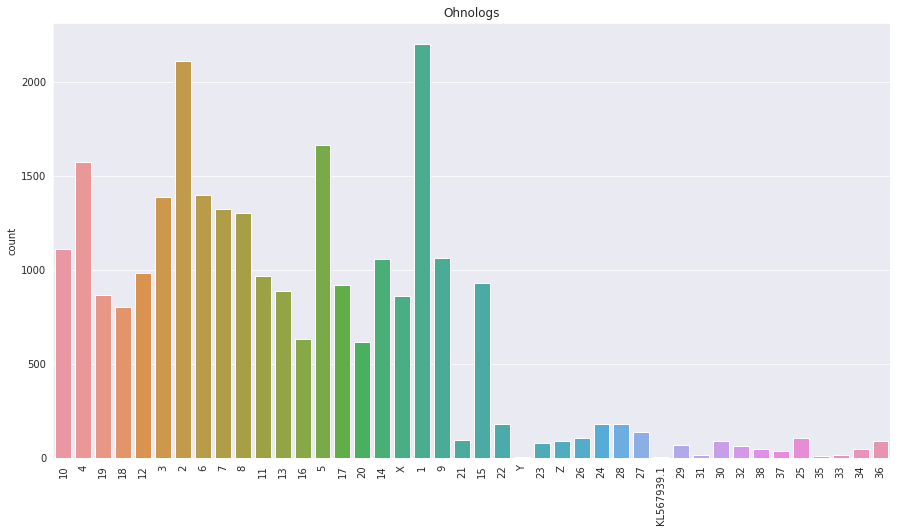

In [98]:
data = "Ohnologs"
ser = df_dict[data]["Sequence-1-Chromosome"].append(df_dict[data]["Sequence-2-Chromosome"])
plt.figure(figsize=(15,8))
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [99]:
ser.unique()
ser_filter = ser[ser != "KL567939.1"]
ser_filter = ser_filter[ser_filter != "AABR07024031.1"]

Text(0.5, 1.0, 'Ohnologs')

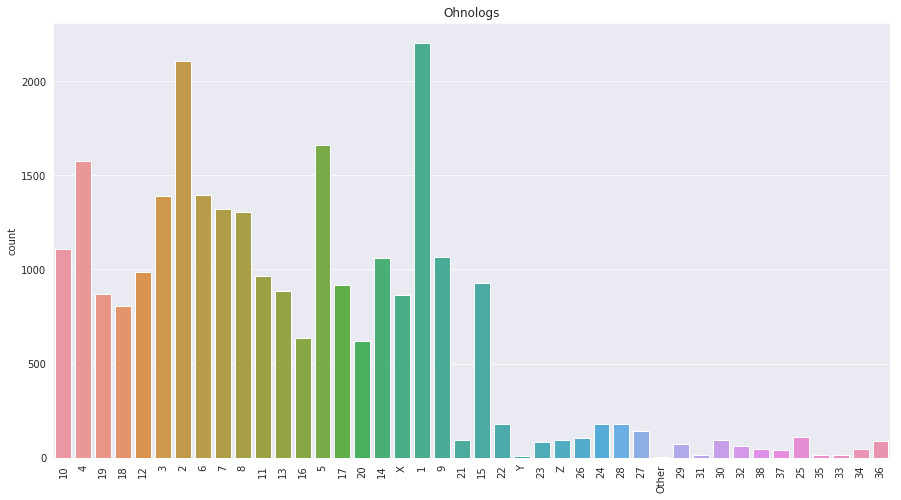

In [100]:
df_dict[data]["Sequence-1-Chromosome"].replace("KL567939.1","Other",inplace=True)
df_dict[data]["Sequence-2-Chromosome"].replace("KL567939.1","Other",inplace=True)

df_dict[data]["Sequence-1-Chromosome"].replace("AABR07024031.1","Other",inplace=True)
df_dict[data]["Sequence-2-Chromosome"].replace("AABR07024031.1","Other",inplace=True)

data = "Ohnologs"
ser = df_dict[data]["Sequence-1-Chromosome"].append(df_dict[data]["Sequence-2-Chromosome"])
plt.figure(figsize=(15,8))
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [101]:
data = "No-Ohnologs"

In [102]:
filter_ids_1 = ~df_dict[data]["Sequence-1-Chromosome"].isin(ser_filter.to_list())
filter_ids_2 = ~df_dict[data]["Sequence-2-Chromosome"].isin(ser_filter.to_list())

df_dict[data].loc[filter_ids_1,"Sequence-1-Chromosome"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Chromosome"] = "Other"

Text(0.5, 1.0, 'No-Ohnologs')

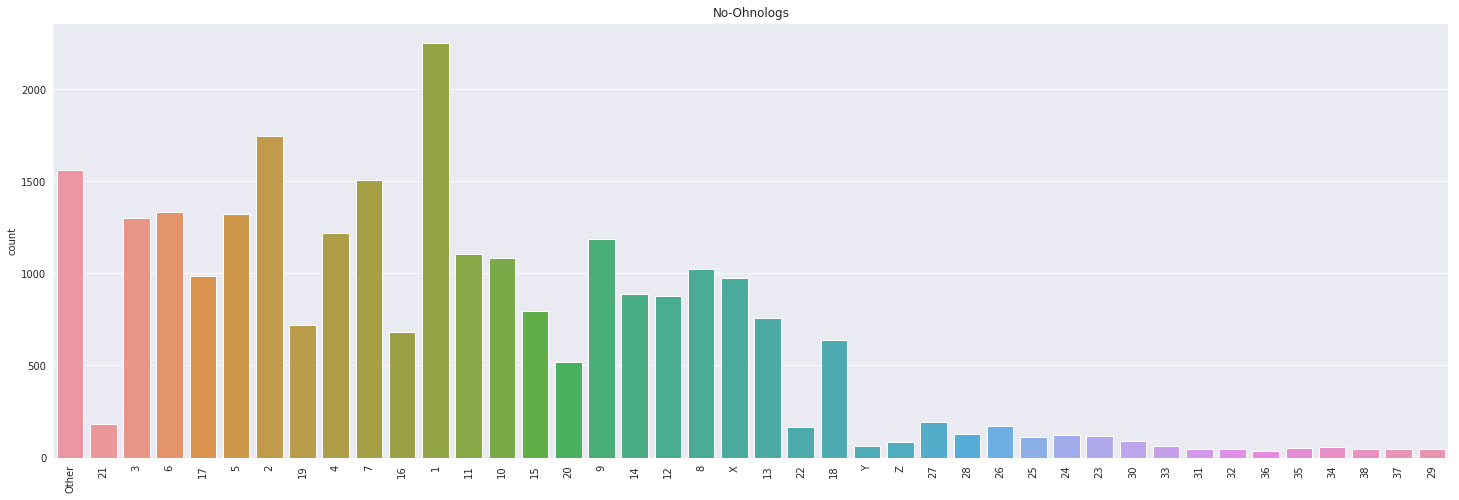

In [103]:
ser = df_dict[data]["Sequence-1-Chromosome"].append(df_dict[data]["Sequence-2-Chromosome"])
plt.figure(figsize=(25,8))
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [104]:
data = "Paralogs"

In [105]:
filter_ids_1 = ~df_dict[data]["Sequence-1-Chromosome"].isin(ser_filter.to_list())
filter_ids_2 = ~df_dict[data]["Sequence-2-Chromosome"].isin(ser_filter.to_list())

df_dict[data].loc[filter_ids_1,"Sequence-1-Chromosome"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Chromosome"] = "Other"

Text(0.5, 1.0, 'Paralogs')

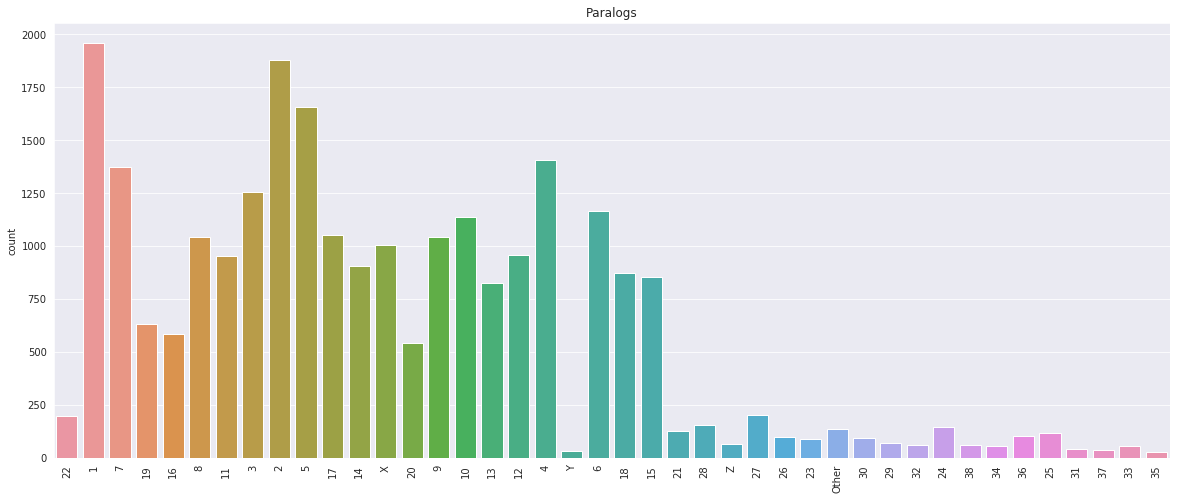

In [106]:
ser = df_dict[data]["Sequence-1-Chromosome"].append(df_dict[data]["Sequence-2-Chromosome"])
plt.figure(figsize=(20,8))
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [107]:
df_dict["Ohnologs"].head()

,Is_Ohnolog,Is_Paralog,Sequence-1,Sequence-1 GC,Sequence-1 Id,Sequence-1 Length,Sequence-1-Transcript Id,Sequence-2,Sequence-2 GC,Sequence-2 Id,Sequence-2 Length,Sequence-2-Transcript Id,Species,Sequence-1-Transcript-Version,Sequence-2-Transcript-Version,Sequence-1-Transcript-Biotype,Sequence-2-Transcript-Biotype,Sequence-1-Chromosome,Sequence-2-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits
0,1,0.0,CTTTGGAAGTCCTATGAGGGACCATTTACGGTTTCCTCAGTAATTT...,0.429090,ENSG00000095464,3307,ENST00000371447,AGTATGTTTTGCAGACAAGACCCAGAGAAGTCCAGACTGGACTTGT...,0.469856,ENSG00000132915,5706,ENST00000508173,Human,3,5,protein_coding,Other,10,5,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17
1,1,0.0,CGTTTTGGCAAGGGATTAAAGTGCTCCCCCCTGTGGCAGCAGTGAC...,0.441268,ENSG00000077684,5772,ENST00000226319,ATACAATAGTGCTCCGCGCCGCCTCAGCCGCCGCCGCCGCCCAACC...,0.450953,ENSG00000102221,4934,ENST00000614628,Human,10,4,protein_coding,protein_coding,4,X,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.5,0.0,2.678500e-03,34.35,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27
2,1,0.0,AGTCAACCTCTGGAAGTAAGTCAACTCCATTCTGAAAAAGAAGAGT...,0.357972,ENSG00000109158,11973,ENST00000264318,ACATAATCTAAGACCACAAACCACCTTGTTCCACGTGAGAAGGAAA...,0.402006,ENSG00000145863,2393,ENST00000523217,Human,3,5,protein_coding,protein_coding,4,5,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.0,0.0,2.130000e-11,60.20,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8
3,1,0.0,CGCGCGGCCAGGCCCTCTTAGCCCTCTGCCGTTTGGGGGGCACGGG...,0.684226,ENSG00000130758,3436,ENST00000253055,GAAGAAGGGAGCGGGGTCGGAGCCGTCGGGGCCAAAGGAGACGGGG...,0.591079,ENSG00000173327,5605,ENST00000527304,Human,7,1,protein_coding,Other,19,11,75.556,405.0,91.0,8.0,1.350000e-51,193.0,75.2000,125.0,28.0,3.0,1.850000e-10,56.50,98.146486,12.702703,0.270270,0.054054,4.554595,22.513514,96.978872,25.641026,3.307692,0.333333,4.321026,27.756410,39
4,1,0.0,CGGTGGGCGGGGGCCGGCAGGTGCTCCGCAGCCGTCTGTGCCACCC...,0.402629,ENSG00000166562,2054,ENST00000509791,AGCGATTCTGCTGCCACAACCTCCTGAGTAGCTGGGATTACAGGCG...,0.493657,ENSG00000140612,3626,ENST00000558924,Human,7,1,protein_coding,Other,18,15,0.000,0.0,0.0,0.0,0.000000e+00,0.0,79.2835,99.0,15.0,3.5,3.590000e-06,67.60,94.591833,18.833333,2.000000,0.166667,1.745333,23.566667,90.764750,38.875000,5.250000,1.000000,1.309001,34.575000,8


In [108]:
df_dict["Ohnologs"] = pd.get_dummies(df_dict["Ohnologs"] ,prefix=['Seq-1-Biotype'],columns=['Sequence-1-Transcript-Biotype'], drop_first=True)
df_dict["Ohnologs"] = pd.get_dummies(df_dict["Ohnologs"] ,prefix=['Seq-2-Biotype'],columns=['Sequence-2-Transcript-Biotype'], drop_first=True)

In [109]:
df_dict["Ohnologs"].head()

,Is_Ohnolog,Is_Paralog,Sequence-1,Sequence-1 GC,Sequence-1 Id,Sequence-1 Length,Sequence-1-Transcript Id,Sequence-2,Sequence-2 GC,Sequence-2 Id,Sequence-2 Length,Sequence-2-Transcript Id,Species,Sequence-1-Transcript-Version,Sequence-2-Transcript-Version,Sequence-1-Chromosome,Sequence-2-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Seq-2-Biotype_protein_coding
0,1,0.0,CTTTGGAAGTCCTATGAGGGACCATTTACGGTTTCCTCAGTAATTT...,0.429090,ENSG00000095464,3307,ENST00000371447,AGTATGTTTTGCAGACAAGACCCAGAGAAGTCCAGACTGGACTTGT...,0.469856,ENSG00000132915,5706,ENST00000508173,Human,3,5,10,5,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17,1,0
1,1,0.0,CGTTTTGGCAAGGGATTAAAGTGCTCCCCCCTGTGGCAGCAGTGAC...,0.441268,ENSG00000077684,5772,ENST00000226319,ATACAATAGTGCTCCGCGCCGCCTCAGCCGCCGCCGCCGCCCAACC...,0.450953,ENSG00000102221,4934,ENST00000614628,Human,10,4,4,X,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.5,0.0,2.678500e-03,34.35,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27,1,1
2,1,0.0,AGTCAACCTCTGGAAGTAAGTCAACTCCATTCTGAAAAAGAAGAGT...,0.357972,ENSG00000109158,11973,ENST00000264318,ACATAATCTAAGACCACAAACCACCTTGTTCCACGTGAGAAGGAAA...,0.402006,ENSG00000145863,2393,ENST00000523217,Human,3,5,4,5,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.0,0.0,2.130000e-11,60.20,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8,1,1
3,1,0.0,CGCGCGGCCAGGCCCTCTTAGCCCTCTGCCGTTTGGGGGGCACGGG...,0.684226,ENSG00000130758,3436,ENST00000253055,GAAGAAGGGAGCGGGGTCGGAGCCGTCGGGGCCAAAGGAGACGGGG...,0.591079,ENSG00000173327,5605,ENST00000527304,Human,7,1,19,11,75.556,405.0,91.0,8.0,1.350000e-51,193.0,75.2000,125.0,28.0,3.0,1.850000e-10,56.50,98.146486,12.702703,0.270270,0.054054,4.554595,22.513514,96.978872,25.641026,3.307692,0.333333,4.321026,27.756410,39,1,0
4,1,0.0,CGGTGGGCGGGGGCCGGCAGGTGCTCCGCAGCCGTCTGTGCCACCC...,0.402629,ENSG00000166562,2054,ENST00000509791,AGCGATTCTGCTGCCACAACCTCCTGAGTAGCTGGGATTACAGGCG...,0.493657,ENSG00000140612,3626,ENST00000558924,Human,7,1,18,15,0.000,0.0,0.0,0.0,0.000000e+00,0.0,79.2835,99.0,15.0,3.5,3.590000e-06,67.60,94.591833,18.833333,2.000000,0.166667,1.745333,23.566667,90.764750,38.875000,5.250000,1.000000,1.309001,34.575000,8,1,0


In [110]:
df_dict["Ohnologs"] = pd.get_dummies(df_dict["Ohnologs"] ,prefix=['Specie'],columns=['Species'], drop_first=False)

In [111]:
pd.set_option("display.max_columns", None)
df_dict["Ohnologs"].head()

,Is_Ohnolog,Is_Paralog,Sequence-1,Sequence-1 GC,Sequence-1 Id,Sequence-1 Length,Sequence-1-Transcript Id,Sequence-2,Sequence-2 GC,Sequence-2 Id,Sequence-2 Length,Sequence-2-Transcript Id,Sequence-1-Transcript-Version,Sequence-2-Transcript-Version,Sequence-1-Chromosome,Sequence-2-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Seq-2-Biotype_protein_coding,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat
0,1,0.0,CTTTGGAAGTCCTATGAGGGACCATTTACGGTTTCCTCAGTAATTT...,0.429090,ENSG00000095464,3307,ENST00000371447,AGTATGTTTTGCAGACAAGACCCAGAGAAGTCCAGACTGGACTTGT...,0.469856,ENSG00000132915,5706,ENST00000508173,3,5,10,5,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17,1,0,0,0,1,0,0,0
1,1,0.0,CGTTTTGGCAAGGGATTAAAGTGCTCCCCCCTGTGGCAGCAGTGAC...,0.441268,ENSG00000077684,5772,ENST00000226319,ATACAATAGTGCTCCGCGCCGCCTCAGCCGCCGCCGCCGCCCAACC...,0.450953,ENSG00000102221,4934,ENST00000614628,10,4,4,X,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.5,0.0,2.678500e-03,34.35,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27,1,1,0,0,1,0,0,0
2,1,0.0,AGTCAACCTCTGGAAGTAAGTCAACTCCATTCTGAAAAAGAAGAGT...,0.357972,ENSG00000109158,11973,ENST00000264318,ACATAATCTAAGACCACAAACCACCTTGTTCCACGTGAGAAGGAAA...,0.402006,ENSG00000145863,2393,ENST00000523217,3,5,4,5,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.0,0.0,2.130000e-11,60.20,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8,1,1,0,0,1,0,0,0
3,1,0.0,CGCGCGGCCAGGCCCTCTTAGCCCTCTGCCGTTTGGGGGGCACGGG...,0.684226,ENSG00000130758,3436,ENST00000253055,GAAGAAGGGAGCGGGGTCGGAGCCGTCGGGGCCAAAGGAGACGGGG...,0.591079,ENSG00000173327,5605,ENST00000527304,7,1,19,11,75.556,405.0,91.0,8.0,1.350000e-51,193.0,75.2000,125.0,28.0,3.0,1.850000e-10,56.50,98.146486,12.702703,0.270270,0.054054,4.554595,22.513514,96.978872,25.641026,3.307692,0.333333,4.321026,27.756410,39,1,0,0,0,1,0,0,0
4,1,0.0,CGGTGGGCGGGGGCCGGCAGGTGCTCCGCAGCCGTCTGTGCCACCC...,0.402629,ENSG00000166562,2054,ENST00000509791,AGCGATTCTGCTGCCACAACCTCCTGAGTAGCTGGGATTACAGGCG...,0.493657,ENSG00000140612,3626,ENST00000558924,7,1,18,15,0.000,0.0,0.0,0.0,0.000000e+00,0.0,79.2835,99.0,15.0,3.5,3.590000e-06,67.60,94.591833,18.833333,2.000000,0.166667,1.745333,23.566667,90.764750,38.875000,5.250000,1.000000,1.309001,34.575000,8,1,0,0,0,1,0,0,0


In [112]:
df_dict["No-Ohnologs"] = pd.get_dummies(df_dict["No-Ohnologs"] ,prefix=['Seq-1-Biotype'],columns=['Sequence-1-Transcript-Biotype'], drop_first=True)
df_dict["No-Ohnologs"] = pd.get_dummies(df_dict["No-Ohnologs"] ,prefix=['Seq-2-Biotype'],columns=['Sequence-2-Transcript-Biotype'], drop_first=True)
df_dict["No-Ohnologs"] = pd.get_dummies(df_dict["No-Ohnologs"] ,prefix=['Specie'],columns=['Species'], drop_first=False)

df_dict["Paralogs"] = pd.get_dummies(df_dict["Paralogs"] ,prefix=['Seq-1-Biotype'],columns=['Sequence-1-Transcript-Biotype'], drop_first=True)
df_dict["Paralogs"] = pd.get_dummies(df_dict["Paralogs"] ,prefix=['Seq-2-Biotype'],columns=['Sequence-2-Transcript-Biotype'], drop_first=True)
df_dict["Paralogs"] = pd.get_dummies(df_dict["Paralogs"] ,prefix=['Specie'],columns=['Species'], drop_first=False)

## Start Designing

In [113]:
blast_columns = ["Percent Identical Matches","Aligment Length","Nr Mismatch","Nr Gap Open","Evalue","Bit Score"]

e_values_columns = ["Evalue_Total","Evalue_High","Evalue_Medium","Evalue_Low"]

blast_types = ["High","Medium","Low","Total"]
blast_col_Total = [i + "_Total" for i in blast_columns] 
blast_col_High = [i + "_High" for i in blast_columns]
blast_col_Medium = [i + "_Medium" for i in blast_columns]
blast_col_Low = [i + "_Low" for i in blast_columns]

blast_cols_levels = blast_col_High + blast_col_Medium + blast_col_Low
total_columns = (blast_col_High + blast_col_Medium + blast_col_Low + blast_col_Total + ["Nr Hits"])

non_training_meta_features = ["Sequence-1","Sequence-2","Sequence-1 Id","Sequence-1-Transcript Id","Sequence-2 Id","Sequence-2-Transcript Id","Sequence-1-Transcript-Version","Sequence-2-Transcript-Version"]

sequence_1_metadata = ["Sequence-1 GC","Sequence-1 Length","Sequence-1-Chromosome","Seq-1-Biotype_protein_coding"]
sequence_2_metadata = ["Sequence-2 GC","Sequence-2 Length","Sequence-2-Chromosome","Seq-2-Biotype_protein_coding"]

sequence_1_metadata_diferential = ["Sequence-1 GC","Sequence-1 Length"]
sequence_2_metadata_diferential = ["Sequence-2 GC","Sequence-2 Length"]

sequence_1_metadata_categorical = ["Sequence-1-Chromosome","Seq-1-Biotype_protein_coding"]
sequence_2_metadata_categorical = ["Sequence-2-Chromosome","Seq-2-Biotype_protein_coding"]

species_metadata = ["Specie_Chicken","Specie_Dog","Specie_Human","Specie_Mouse","Specie_Pig","Specie_Rat"]

emb_size = 100

embedding_1_cols = ["Embedding1_" + str(i) for i in range(0,emb_size)]
embedding_2_cols = ["Embedding2_" + str(i) for i in range(0,emb_size)]

In [114]:
#A = -1.5, C = 0.5,
#G = -0.5, T = 1.5

In [115]:
def get_seq_numerical_representation(sequence):
    new_sequence = ""
    for nucleotide in sequence:
        if(nucleotide == 'A'):
            new_sequence += "-1.5"
        if(nucleotide == 'C'):
            new_sequence += "0.5"
        if(nucleotide == 'G'):
            new_sequence += "0.5"
        if(nucleotide == 'T'):
            new_sequence += "1.5"            
        if(nucleotide == 'N'):
            new_sequence += "0"            
        new_sequence += ','                            
    return new_sequence

In [125]:
df_dict_sequences = {}
df_dict_sequences_numerical = {}

In [127]:
for data in dataList :
    df_dict_sequences[data] = {}
    df_dict_sequences[data]["1"] = df_dict[data]["Sequence-1"]
    df_dict_sequences[data]["2"] = df_dict[data]["Sequence-2"]

In [131]:
for data in dataList :    
    sequence_1_numerical_representation = []
    sequence_2_numerical_representation = []    
    df_dict_sequences_numerical[data] = {}    
    for i in df_dict_sequences[data]["1"]:
        sequence_1_numerical_representation.append(get_seq_numerical_representation(i))
    for i in df_dict_sequences[data]["2"]:
        sequence_2_numerical_representation.append(get_seq_numerical_representation(i))
                            
    df_dict_sequences_numerical[data]["1"] = sequence_1_numerical_representation
    df_dict_sequences_numerical[data]["2"] = sequence_2_numerical_representation                

In [132]:
## Ver los efectos de no normalizar las longitudes o tambien de como hacer el encoding de los Chromosomas
dataset_ohnologs = df_dict["Ohnologs"].drop(non_training_meta_features,axis=1)

cols = dataset_ohnologs.columns.tolist()
cols.insert(3, cols.pop(5))
cols.insert(4, cols.pop(7))
dataset_ohnologs = dataset_ohnologs[cols]

df_temp_1 = pd.DataFrame()
df_temp_1["Sequence 1 Numerical"] = df_dict_sequences_numerical["Ohnologs"]["1"]

df_temp_2 = pd.DataFrame()
df_temp_2["Sequence 2 Numerical"] = df_dict_sequences_numerical["Ohnologs"]["2"]

dataset_ohnologs = pd.concat([dataset_ohnologs[species_metadata],dataset_ohnologs.drop(dataset_ohnologs[species_metadata],axis=1)],axis=1, sort=False)
dataset_ohnologs = pd.concat([dataset_ohnologs,df_temp_1,df_temp_2],axis=1, sort=False)
dataset_ohnologs.head()

,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-2 Length,Sequence-2-Chromosome,Sequence-1 Length,Sequence-2 GC,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Seq-2-Biotype_protein_coding,Sequence 1 Numerical,Sequence 2 Numerical
0,0,0,1,0,0,0,1,0.0,0.429090,5706,5,3307,0.469856,10,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17,1,0,"0.5,1.5,1.5,1.5,0.5,0.5,-1.5,-1.5,0.5,1.5,0.5,...","-1.5,0.5,1.5,-1.5,1.5,0.5,1.5,1.5,1.5,1.5,0.5,..."
1,0,0,1,0,0,0,1,0.0,0.441268,4934,X,5772,0.450953,4,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.5,0.0,2.678500e-03,34.35,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27,1,1,"0.5,0.5,1.5,1.5,1.5,1.5,0.5,0.5,0.5,-1.5,-1.5,...","-1.5,1.5,-1.5,0.5,-1.5,-1.5,1.5,-1.5,0.5,1.5,0..."
2,0,0,1,0,0,0,1,0.0,0.357972,2393,5,11973,0.402006,4,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.0,0.0,2.130000e-11,60.20,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8,1,1,"-1.5,0.5,1.5,0.5,-1.5,-1.5,0.5,0.5,1.5,0.5,1.5...","-1.5,0.5,-1.5,1.5,-1.5,-1.5,1.5,0.5,1.5,-1.5,-..."
3,0,0,1,0,0,0,1,0.0,0.684226,5605,11,3436,0.591079,19,75.556,405.0,91.0,8.0,1.350000e-51,193.0,75.2000,125.0,28.0,3.0,1.850000e-10,56.50,98.146486,12.702703,0.270270,0.054054,4.554595,22.513514,96.978872,25.641026,3.307692,0.333333,4.321026,27.756410,39,1,0,"0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,-1.5,0.5,0...","0.5,-1.5,-1.5,0.5,-1.5,-1.5,0.5,0.5,0.5,-1.5,0..."
4,0,0,1,0,0,0,1,0.0,0.402629,3626,15,2054,0.493657,18,0.000,0.0,0.0,0.0,0.000000e+00,0.0,79.2835,99.0,15.0,3.5,3.590000e-06,67.60,94.591833,18.833333,2.000000,0.166667,1.745333,23.566667,90.764750,38.875000,5.250000,1.000000,1.309001,34.575000,8,1,0,"0.5,0.5,0.5,1.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0....","-1.5,0.5,0.5,0.5,-1.5,1.5,1.5,0.5,1.5,0.5,0.5,..."


In [134]:
dataset_ohnologs.reset_index(inplace=True, drop=True)
cols = dataset_ohnologs.columns.tolist()
dataset_ohnologs = pd.concat([dataset_ohnologs[cols[:10]],dataset_ohnologs["Seq-1-Biotype_protein_coding"],dataset_ohnologs[cols[10:]].drop(["Seq-1-Biotype_protein_coding"],axis=1)],axis=1, sort=False)
dataset_ohnologs.head()

,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-2 Length,Seq-1-Biotype_protein_coding,Sequence-2-Chromosome,Sequence-1 Length,Sequence-2 GC,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-2-Biotype_protein_coding,Sequence 1 Numerical,Sequence 2 Numerical
0,0,0,1,0,0,0,1,0.0,0.429090,5706,1,5,3307,0.469856,10,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17,0,"0.5,1.5,1.5,1.5,0.5,0.5,-1.5,-1.5,0.5,1.5,0.5,...","-1.5,0.5,1.5,-1.5,1.5,0.5,1.5,1.5,1.5,1.5,0.5,..."
1,0,0,1,0,0,0,1,0.0,0.441268,4934,1,X,5772,0.450953,4,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.5,0.0,2.678500e-03,34.35,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27,1,"0.5,0.5,1.5,1.5,1.5,1.5,0.5,0.5,0.5,-1.5,-1.5,...","-1.5,1.5,-1.5,0.5,-1.5,-1.5,1.5,-1.5,0.5,1.5,0..."
2,0,0,1,0,0,0,1,0.0,0.357972,2393,1,5,11973,0.402006,4,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.0,0.0,2.130000e-11,60.20,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8,1,"-1.5,0.5,1.5,0.5,-1.5,-1.5,0.5,0.5,1.5,0.5,1.5...","-1.5,0.5,-1.5,1.5,-1.5,-1.5,1.5,0.5,1.5,-1.5,-..."
3,0,0,1,0,0,0,1,0.0,0.684226,5605,1,11,3436,0.591079,19,75.556,405.0,91.0,8.0,1.350000e-51,193.0,75.2000,125.0,28.0,3.0,1.850000e-10,56.50,98.146486,12.702703,0.270270,0.054054,4.554595,22.513514,96.978872,25.641026,3.307692,0.333333,4.321026,27.756410,39,0,"0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,-1.5,0.5,0...","0.5,-1.5,-1.5,0.5,-1.5,-1.5,0.5,0.5,0.5,-1.5,0..."
4,0,0,1,0,0,0,1,0.0,0.402629,3626,1,15,2054,0.493657,18,0.000,0.0,0.0,0.0,0.000000e+00,0.0,79.2835,99.0,15.0,3.5,3.590000e-06,67.60,94.591833,18.833333,2.000000,0.166667,1.745333,23.566667,90.764750,38.875000,5.250000,1.000000,1.309001,34.575000,8,0,"0.5,0.5,0.5,1.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0....","-1.5,0.5,0.5,0.5,-1.5,1.5,1.5,0.5,1.5,0.5,0.5,..."


In [135]:
## Realizar lo mismo con los No Ohnologs
dataset_no_ohnologs = df_dict["No-Ohnologs"].drop(non_training_meta_features,axis=1)

cols = dataset_no_ohnologs.columns.tolist()
cols.insert(3, cols.pop(5))
cols.insert(4, cols.pop(7))
dataset_no_ohnologs = dataset_no_ohnologs[cols]

df_temp_1 = pd.DataFrame()
df_temp_1["Sequence 1 Numerical"] = df_dict_sequences_numerical["No-Ohnologs"]["1"]

df_temp_2 = pd.DataFrame()
df_temp_2["Sequence 2 Numerical"] = df_dict_sequences_numerical["No-Ohnologs"]["2"]

dataset_no_ohnologs = pd.concat([dataset_no_ohnologs[species_metadata],dataset_no_ohnologs.drop(dataset_no_ohnologs[species_metadata],axis=1)],axis=1, sort=False)
dataset_no_ohnologs = pd.concat([dataset_no_ohnologs,df_temp_1,df_temp_2],axis=1, sort=False)
dataset_no_ohnologs.head()

,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-2 Length,Sequence-2-Chromosome,Sequence-1 Length,Sequence-2 GC,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Seq-2-Biotype_protein_coding,Sequence 1 Numerical,Sequence 2 Numerical
0,0,0,1,0,0,0,0,0.0,0.631815,3581,10,2678,0.447640,Other,80.94975,892.5,161.5,10.75,2.925000e-88,663.25,89.951,29.0,3.0,0.0,0.002011,38.05,96.001813,16.520833,0.708333,0.333333,4.218667,25.327083,94.662741,81.870370,12.703704,1.092593,3.750000,73.051852,54.0,1,1,"0.5,1.5,-1.5,0.5,-1.5,1.5,0.5,1.5,0.5,1.5,0.5,...","-1.5,-1.5,1.5,0.5,-1.5,0.5,1.5,0.5,0.5,-1.5,1...."
1,0,0,1,0,0,0,0,0.0,0.528686,5345,12,1865,0.573807,Other,0.00000,0.0,0.0,0.00,0.000000e+00,0.00,83.333,36.0,4.0,2.0,0.004000,32.50,98.329071,12.500000,0.142857,0.142857,5.523571,22.464286,97.329333,14.066667,0.400000,0.266667,5.155600,23.133333,15.0,1,1,"0.5,-1.5,0.5,0.5,0.5,0.5,0.5,0.5,1.5,0.5,1.5,0...","-1.5,0.5,0.5,-1.5,0.5,-1.5,0.5,0.5,1.5,0.5,0.5..."
2,0,0,1,0,0,0,0,0.0,0.477408,4157,12,8764,0.408708,21,0.00000,0.0,0.0,0.00,0.000000e+00,0.00,88.462,26.0,3.0,0.0,0.001000,32.50,100.000000,11.333333,0.000000,0.000000,1.750000,22.033333,98.351714,13.428571,0.428571,0.000000,1.500143,23.528571,7.0,1,1,"0.5,0.5,0.5,1.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1....","0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.5,0.5,0.5,0.5,0...."
3,0,0,1,0,0,0,0,0.0,0.446064,2209,7,4459,0.522861,3,0.00000,0.0,0.0,0.00,0.000000e+00,0.00,83.333,36.0,4.0,2.0,0.002000,32.50,98.611111,12.333333,0.000000,0.222222,2.433333,22.233333,97.083300,14.700000,0.400000,0.400000,2.190200,23.260000,10.0,0,1,"0.5,-1.5,0.5,0.5,-1.5,-1.5,0.5,-1.5,1.5,0.5,0....","-1.5,0.5,-1.5,0.5,-1.5,0.5,0.5,-1.5,0.5,0.5,0...."
4,0,0,1,0,0,0,0,0.0,0.535088,5352,20,1254,0.529148,6,0.00000,0.0,0.0,0.00,0.000000e+00,0.00,0.000,0.0,0.0,0.0,0.000000,0.00,95.161250,16.750000,0.750000,0.750000,0.705500,22.800000,95.161250,16.750000,0.750000,0.750000,0.705500,22.800000,4.0,1,1,"0.5,0.5,0.5,0.5,0.5,-1.5,0.5,0.5,0.5,0.5,-1.5,...","-1.5,-1.5,-1.5,1.5,1.5,0.5,-1.5,1.5,1.5,0.5,0...."


In [136]:
dataset_no_ohnologs.reset_index(inplace=True, drop=True)

cols = dataset_no_ohnologs.columns.tolist()
dataset_no_ohnologs = pd.concat([dataset_no_ohnologs[cols[:10]],dataset_no_ohnologs["Seq-1-Biotype_protein_coding"],dataset_no_ohnologs[cols[10:]].drop(["Seq-1-Biotype_protein_coding"],axis=1)],axis=1, sort=False)
dataset_no_ohnologs.head()

,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-2 Length,Seq-1-Biotype_protein_coding,Sequence-2-Chromosome,Sequence-1 Length,Sequence-2 GC,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-2-Biotype_protein_coding,Sequence 1 Numerical,Sequence 2 Numerical
0,0,0,1,0,0,0,0,0.0,0.631815,3581,1,10,2678,0.447640,Other,80.94975,892.5,161.5,10.75,2.925000e-88,663.25,89.951,29.0,3.0,0.0,0.002011,38.05,96.001813,16.520833,0.708333,0.333333,4.218667,25.327083,94.662741,81.870370,12.703704,1.092593,3.750000,73.051852,54.0,1,"0.5,1.5,-1.5,0.5,-1.5,1.5,0.5,1.5,0.5,1.5,0.5,...","-1.5,-1.5,1.5,0.5,-1.5,0.5,1.5,0.5,0.5,-1.5,1...."
1,0,0,1,0,0,0,0,0.0,0.528686,5345,1,12,1865,0.573807,Other,0.00000,0.0,0.0,0.00,0.000000e+00,0.00,83.333,36.0,4.0,2.0,0.004000,32.50,98.329071,12.500000,0.142857,0.142857,5.523571,22.464286,97.329333,14.066667,0.400000,0.266667,5.155600,23.133333,15.0,1,"0.5,-1.5,0.5,0.5,0.5,0.5,0.5,0.5,1.5,0.5,1.5,0...","-1.5,0.5,0.5,-1.5,0.5,-1.5,0.5,0.5,1.5,0.5,0.5..."
2,0,0,1,0,0,0,0,0.0,0.477408,4157,1,12,8764,0.408708,21,0.00000,0.0,0.0,0.00,0.000000e+00,0.00,88.462,26.0,3.0,0.0,0.001000,32.50,100.000000,11.333333,0.000000,0.000000,1.750000,22.033333,98.351714,13.428571,0.428571,0.000000,1.500143,23.528571,7.0,1,"0.5,0.5,0.5,1.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1....","0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.5,0.5,0.5,0.5,0...."
3,0,0,1,0,0,0,0,0.0,0.446064,2209,0,7,4459,0.522861,3,0.00000,0.0,0.0,0.00,0.000000e+00,0.00,83.333,36.0,4.0,2.0,0.002000,32.50,98.611111,12.333333,0.000000,0.222222,2.433333,22.233333,97.083300,14.700000,0.400000,0.400000,2.190200,23.260000,10.0,1,"0.5,-1.5,0.5,0.5,-1.5,-1.5,0.5,-1.5,1.5,0.5,0....","-1.5,0.5,-1.5,0.5,-1.5,0.5,0.5,-1.5,0.5,0.5,0...."
4,0,0,1,0,0,0,0,0.0,0.535088,5352,1,20,1254,0.529148,6,0.00000,0.0,0.0,0.00,0.000000e+00,0.00,0.000,0.0,0.0,0.0,0.000000,0.00,95.161250,16.750000,0.750000,0.750000,0.705500,22.800000,95.161250,16.750000,0.750000,0.750000,0.705500,22.800000,4.0,1,"0.5,0.5,0.5,0.5,0.5,-1.5,0.5,0.5,0.5,0.5,-1.5,...","-1.5,-1.5,-1.5,1.5,1.5,0.5,-1.5,1.5,1.5,0.5,0...."


In [137]:
## Realizar lo mismo con los No Ohnologs
dataset_paralogs = df_dict["Paralogs"].drop(non_training_meta_features,axis=1)

cols = dataset_paralogs.columns.tolist()
cols.insert(3, cols.pop(5))
cols.insert(4, cols.pop(7))
dataset_paralogs = dataset_paralogs[cols]

df_temp_1 = pd.DataFrame()
df_temp_1["Sequence 1 Numerical"] = df_dict_sequences_numerical["Paralogs"]["1"]

df_temp_2 = pd.DataFrame()
df_temp_2["Sequence 2 Numerical"] = df_dict_sequences_numerical["Paralogs"]["2"]

dataset_paralogs = pd.concat([dataset_paralogs[species_metadata],dataset_paralogs.drop(dataset_paralogs[species_metadata],axis=1)],axis=1, sort=False)
dataset_paralogs = pd.concat([dataset_paralogs,df_temp_1,df_temp_2],axis=1, sort=False)
dataset_paralogs.head()

,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-2 Length,Sequence-2-Chromosome,Sequence-1 Length,Sequence-2 GC,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Seq-2-Biotype_protein_coding,Sequence 1 Numerical,Sequence 2 Numerical
0,0,0,1,0,0,0,0,1.0,0.613954,8138,17,10004,0.604694,22,80.94975,892.5,161.5,10.75,2.925000e-88,663.25,89.951,29.0,3.0,0.0,0.002011,38.05,96.001813,16.520833,0.708333,0.333333,4.218667,25.327083,94.662741,81.870370,12.703704,1.092593,3.750000,73.051852,54,1,1,"-1.5,1.5,0.5,0.5,0.5,1.5,0.5,-1.5,0.5,-1.5,0.5...","0.5,0.5,0.5,0.5,0.5,0.5,1.5,0.5,0.5,0.5,0.5,0...."
1,0,0,1,0,0,0,0,1.0,0.608192,5832,1,3882,0.441187,1,0.00000,0.0,0.0,0.00,0.000000e+00,0.00,83.333,36.0,4.0,2.0,0.004000,32.50,98.329071,12.500000,0.142857,0.142857,5.523571,22.464286,97.329333,14.066667,0.400000,0.266667,5.155600,23.133333,15,1,1,"0.5,-1.5,0.5,-1.5,0.5,0.5,0.5,1.5,0.5,-1.5,0.5...","0.5,-1.5,0.5,0.5,1.5,0.5,0.5,-1.5,0.5,0.5,-1.5..."
2,0,0,1,0,0,0,0,1.0,0.541130,3335,12,2018,0.587106,7,0.00000,0.0,0.0,0.00,0.000000e+00,0.00,88.462,26.0,3.0,0.0,0.001000,32.50,100.000000,11.333333,0.000000,0.000000,1.750000,22.033333,98.351714,13.428571,0.428571,0.000000,1.500143,23.528571,7,1,1,"0.5,1.5,0.5,0.5,1.5,0.5,0.5,0.5,0.5,0.5,0.5,-1...","0.5,0.5,1.5,0.5,-1.5,0.5,1.5,0.5,0.5,0.5,0.5,0..."
3,0,0,1,0,0,0,0,1.0,0.647368,5008,1,1900,0.561502,19,0.00000,0.0,0.0,0.00,0.000000e+00,0.00,83.333,36.0,4.0,2.0,0.002000,32.50,98.611111,12.333333,0.000000,0.222222,2.433333,22.233333,97.083300,14.700000,0.400000,0.400000,2.190200,23.260000,10,1,1,"0.5,1.5,0.5,-1.5,1.5,1.5,0.5,0.5,0.5,0.5,-1.5,...","-1.5,-1.5,0.5,1.5,-1.5,0.5,0.5,-1.5,-1.5,0.5,0..."
4,0,0,1,0,0,0,0,1.0,0.580530,2438,X,1397,0.551272,16,0.00000,0.0,0.0,0.00,0.000000e+00,0.00,0.000,0.0,0.0,0.0,0.000000,0.00,95.161250,16.750000,0.750000,0.750000,0.705500,22.800000,95.161250,16.750000,0.750000,0.750000,0.705500,22.800000,4,1,1,"0.5,0.5,1.5,-1.5,0.5,-1.5,0.5,-1.5,0.5,0.5,0.5...","-1.5,-1.5,-1.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5..."


In [138]:
dataset_paralogs.reset_index(inplace=True, drop=True)

cols = dataset_paralogs.columns.tolist()
dataset_paralogs = pd.concat([dataset_paralogs[cols[:10]],dataset_paralogs["Seq-1-Biotype_protein_coding"],dataset_paralogs[cols[10:]].drop(["Seq-1-Biotype_protein_coding"],axis=1)],axis=1, sort=False)
dataset_paralogs.tail()

,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-2 Length,Seq-1-Biotype_protein_coding,Sequence-2-Chromosome,Sequence-1 Length,Sequence-2 GC,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-2-Biotype_protein_coding,Sequence 1 Numerical,Sequence 2 Numerical
12505,0,1,0,0,0,0,0,1.0,0.515764,6123,1,X,6090,0.408460,20,0.0,0.0,0.0,0.0,0.0,0.0,100.000,19.0,0.0,0.0,4.680000e-04,36.2,97.638900,13.700000,0.300000,0.100000,2.560000,24.020000,97.853545,14.181818,0.272727,0.090909,2.327315,25.127273,11,1,"-1.5,1.5,0.5,1.5,0.5,0.5,-1.5,0.5,0.5,0.5,0.5,...","0.5,-1.5,-1.5,-1.5,-1.5,0.5,-1.5,0.5,0.5,-1.5,..."
12506,0,1,0,0,0,0,0,1.0,0.661376,6053,1,5,3024,0.412688,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000e+00,0.0,97.500000,13.500000,0.000000,0.500000,3.775000,22.800000,97.500000,13.500000,0.000000,0.500000,3.775000,22.800000,4,1,"-1.5,1.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0...","0.5,-1.5,-1.5,0.5,1.5,1.5,0.5,0.5,0.5,0.5,1.5,..."
12507,0,1,0,0,0,0,0,1.0,0.426522,2653,1,24,2300,0.411233,8,0.0,0.0,0.0,0.0,0.0,0.0,78.409,88.0,17.0,2.0,5.830000e-11,56.5,98.641889,12.777778,0.000000,0.222222,1.472111,23.055556,96.618600,20.300000,1.700000,0.400000,1.324900,26.400000,10,1,"0.5,1.5,1.5,-1.5,0.5,0.5,1.5,0.5,0.5,-1.5,-1.5...","0.5,0.5,-1.5,0.5,0.5,0.5,1.5,0.5,0.5,0.5,0.5,0..."
12508,0,1,0,0,0,0,0,1.0,0.653333,1047,1,Other,1425,0.423114,3,0.0,0.0,0.0,0.0,0.0,0.0,85.294,34.0,5.0,0.0,1.840000e-05,36.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.294000,34.000000,5.000000,0.000000,0.000018,36.200000,1,1,"-1.5,1.5,0.5,0.5,1.5,0.5,0.5,0.5,0.5,0.5,0.5,0...","-1.5,1.5,0.5,-1.5,1.5,0.5,-1.5,-1.5,1.5,1.5,0...."
12509,0,1,0,0,0,0,0,1.0,0.519667,8736,1,9,3000,0.520375,16,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000e+00,0.0,98.972737,12.157895,0.052632,0.157895,7.237368,22.189474,98.972737,12.157895,0.052632,0.157895,7.237368,22.189474,19,1,"0.5,0.5,-1.5,0.5,1.5,-1.5,-1.5,-1.5,0.5,1.5,0....","1.5,-1.5,-1.5,0.5,-1.5,-1.5,0.5,0.5,-1.5,0.5,0..."


In [139]:
print(len(dataset_ohnologs))
print(len(dataset_no_ohnologs))
print(len(dataset_paralogs))

dataset_complete = dataset_ohnologs.append(dataset_no_ohnologs)
dataset_complete = dataset_complete.append(dataset_paralogs)

dataset_complete_half = dataset_ohnologs.append(dataset_no_ohnologs.head(int(len(dataset_ohnologs)/2)))
dataset_complete_half = dataset_complete_half.append(dataset_paralogs.head(int(len(dataset_ohnologs)/2)))
print(len(dataset_complete))
print(len(dataset_complete_half))
dataset_complete_half.head()

13169
13169
12510
38848
26337


,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-2 Length,Seq-1-Biotype_protein_coding,Sequence-2-Chromosome,Sequence-1 Length,Sequence-2 GC,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-2-Biotype_protein_coding,Sequence 1 Numerical,Sequence 2 Numerical
0,0,0,1,0,0,0,1,0.0,0.429090,5706,1,5,3307,0.469856,10,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17.0,0,"0.5,1.5,1.5,1.5,0.5,0.5,-1.5,-1.5,0.5,1.5,0.5,...","-1.5,0.5,1.5,-1.5,1.5,0.5,1.5,1.5,1.5,1.5,0.5,..."
1,0,0,1,0,0,0,1,0.0,0.441268,4934,1,X,5772,0.450953,4,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.5,0.0,2.678500e-03,34.35,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27.0,1,"0.5,0.5,1.5,1.5,1.5,1.5,0.5,0.5,0.5,-1.5,-1.5,...","-1.5,1.5,-1.5,0.5,-1.5,-1.5,1.5,-1.5,0.5,1.5,0..."
2,0,0,1,0,0,0,1,0.0,0.357972,2393,1,5,11973,0.402006,4,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.0,0.0,2.130000e-11,60.20,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8.0,1,"-1.5,0.5,1.5,0.5,-1.5,-1.5,0.5,0.5,1.5,0.5,1.5...","-1.5,0.5,-1.5,1.5,-1.5,-1.5,1.5,0.5,1.5,-1.5,-..."
3,0,0,1,0,0,0,1,0.0,0.684226,5605,1,11,3436,0.591079,19,75.556,405.0,91.0,8.0,1.350000e-51,193.0,75.2000,125.0,28.0,3.0,1.850000e-10,56.50,98.146486,12.702703,0.270270,0.054054,4.554595,22.513514,96.978872,25.641026,3.307692,0.333333,4.321026,27.756410,39.0,0,"0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,-1.5,0.5,0...","0.5,-1.5,-1.5,0.5,-1.5,-1.5,0.5,0.5,0.5,-1.5,0..."
4,0,0,1,0,0,0,1,0.0,0.402629,3626,1,15,2054,0.493657,18,0.000,0.0,0.0,0.0,0.000000e+00,0.0,79.2835,99.0,15.0,3.5,3.590000e-06,67.60,94.591833,18.833333,2.000000,0.166667,1.745333,23.566667,90.764750,38.875000,5.250000,1.000000,1.309001,34.575000,8.0,0,"0.5,0.5,0.5,1.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0....","-1.5,0.5,0.5,0.5,-1.5,1.5,1.5,0.5,1.5,0.5,0.5,..."


In [140]:
dataset_complete = dataset_complete.astype({"Is_Ohnolog": int,"Sequence-1 Length" : int, "Sequence-2 Length": int})
dataset_complete_half = dataset_complete_half.astype({"Is_Ohnolog": int,"Sequence-1 Length" : int, "Sequence-2 Length": int})


In [208]:
dataset_complete["Sequence-1-Chromosome"].unique()

array(['10', '4', '6', '5', '9', '1', '19', '11', '18', '12', '3', '2',
       '20', '17', '7', '8', '13', '16', '14', 'X', '15', 'Y', '22', '21',
       '23', 'Z', '26', '28', '24', '27', 'Other', '38', '29', '25', '34',
       '37', '31', '33', '30', '32', '35', '36'], dtype=object)

In [141]:
seq1 = list(dataset_complete["Sequence-1-Chromosome"].unique())
seq2 = list(dataset_complete["Sequence-2-Chromosome"].unique())
chrm_values = list(set((seq1 + seq2)))
cleaned = [ int(x) for x in chrm_values if x.isdigit() ]
current_max = max(cleaned)
current_max

38

In [142]:
chromosome_dict = {}

for i in range(1,current_max+1):
    chromosome_dict[str(i)] = str(i)

chromosome_dict["X"] = str(current_max + 1)
chromosome_dict["Y"] = str(current_max + 2)
chromosome_dict["Z"] = str(current_max + 3)
chromosome_dict["Other"] = str(current_max + 4)

dataset_complete.loc[dataset_complete['Sequence-1-Chromosome'] == "X", 'Sequence-1-Chromosome'] = str(current_max + 1)
dataset_complete.loc[dataset_complete['Sequence-2-Chromosome'] == "X", 'Sequence-2-Chromosome'] = str(current_max + 1)

dataset_complete.loc[dataset_complete['Sequence-1-Chromosome'] == "Y", 'Sequence-1-Chromosome'] = str(current_max + 2)
dataset_complete.loc[dataset_complete['Sequence-2-Chromosome'] == "Y", 'Sequence-2-Chromosome'] = str(current_max + 2)

dataset_complete.loc[dataset_complete['Sequence-1-Chromosome'] == "Z", 'Sequence-1-Chromosome'] = str(current_max + 3)
dataset_complete.loc[dataset_complete['Sequence-2-Chromosome'] == "Z", 'Sequence-2-Chromosome'] = str(current_max + 3)

dataset_complete.loc[dataset_complete['Sequence-1-Chromosome'] == "Other", 'Sequence-1-Chromosome'] = str(current_max + 4)
dataset_complete.loc[dataset_complete['Sequence-2-Chromosome'] == "Other", 'Sequence-2-Chromosome'] = str(current_max + 4)


dataset_complete_half.loc[dataset_complete_half['Sequence-1-Chromosome'] == "X", 'Sequence-1-Chromosome'] = str(current_max + 1)
dataset_complete_half.loc[dataset_complete_half['Sequence-2-Chromosome'] == "X", 'Sequence-2-Chromosome'] = str(current_max + 1)

dataset_complete_half.loc[dataset_complete_half['Sequence-1-Chromosome'] == "Y", 'Sequence-1-Chromosome'] = str(current_max + 2)
dataset_complete_half.loc[dataset_complete_half['Sequence-2-Chromosome'] == "Y", 'Sequence-2-Chromosome'] = str(current_max + 2)

dataset_complete_half.loc[dataset_complete_half['Sequence-1-Chromosome'] == "Z", 'Sequence-1-Chromosome'] = str(current_max + 3)
dataset_complete_half.loc[dataset_complete_half['Sequence-2-Chromosome'] == "Z", 'Sequence-2-Chromosome'] = str(current_max + 3)

dataset_complete_half.loc[dataset_complete_half['Sequence-1-Chromosome'] == "Other", 'Sequence-1-Chromosome'] = str(current_max + 4)
dataset_complete_half.loc[dataset_complete_half['Sequence-2-Chromosome'] == "Other", 'Sequence-2-Chromosome'] = str(current_max + 4)

dataset_complete_half.head()

,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-2 Length,Seq-1-Biotype_protein_coding,Sequence-2-Chromosome,Sequence-1 Length,Sequence-2 GC,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-2-Biotype_protein_coding,Sequence 1 Numerical,Sequence 2 Numerical
0,0,0,1,0,0,0,1,0.0,0.429090,5706,1,5,3307,0.469856,10,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17.0,0,"0.5,1.5,1.5,1.5,0.5,0.5,-1.5,-1.5,0.5,1.5,0.5,...","-1.5,0.5,1.5,-1.5,1.5,0.5,1.5,1.5,1.5,1.5,0.5,..."
1,0,0,1,0,0,0,1,0.0,0.441268,4934,1,39,5772,0.450953,4,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.5,0.0,2.678500e-03,34.35,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27.0,1,"0.5,0.5,1.5,1.5,1.5,1.5,0.5,0.5,0.5,-1.5,-1.5,...","-1.5,1.5,-1.5,0.5,-1.5,-1.5,1.5,-1.5,0.5,1.5,0..."
2,0,0,1,0,0,0,1,0.0,0.357972,2393,1,5,11973,0.402006,4,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.0,0.0,2.130000e-11,60.20,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8.0,1,"-1.5,0.5,1.5,0.5,-1.5,-1.5,0.5,0.5,1.5,0.5,1.5...","-1.5,0.5,-1.5,1.5,-1.5,-1.5,1.5,0.5,1.5,-1.5,-..."
3,0,0,1,0,0,0,1,0.0,0.684226,5605,1,11,3436,0.591079,19,75.556,405.0,91.0,8.0,1.350000e-51,193.0,75.2000,125.0,28.0,3.0,1.850000e-10,56.50,98.146486,12.702703,0.270270,0.054054,4.554595,22.513514,96.978872,25.641026,3.307692,0.333333,4.321026,27.756410,39.0,0,"0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,-1.5,0.5,0...","0.5,-1.5,-1.5,0.5,-1.5,-1.5,0.5,0.5,0.5,-1.5,0..."
4,0,0,1,0,0,0,1,0.0,0.402629,3626,1,15,2054,0.493657,18,0.000,0.0,0.0,0.0,0.000000e+00,0.0,79.2835,99.0,15.0,3.5,3.590000e-06,67.60,94.591833,18.833333,2.000000,0.166667,1.745333,23.566667,90.764750,38.875000,5.250000,1.000000,1.309001,34.575000,8.0,0,"0.5,0.5,0.5,1.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0....","-1.5,0.5,0.5,0.5,-1.5,1.5,1.5,0.5,1.5,0.5,0.5,..."


In [143]:
dataset_complete = dataset_complete.astype({"Sequence-1-Chromosome": int,"Sequence-2-Chromosome" : int})
dataset_complete_half = dataset_complete_half.astype({"Sequence-1-Chromosome": int,"Sequence-2-Chromosome" : int})

In [144]:
dataset_complete_no_scaling = dataset_complete.copy()
dataset_complete_no_scaling_half = dataset_complete_half.copy()
dataset_complete_no_scaling_half.head()

,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-2 Length,Seq-1-Biotype_protein_coding,Sequence-2-Chromosome,Sequence-1 Length,Sequence-2 GC,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-2-Biotype_protein_coding,Sequence 1 Numerical,Sequence 2 Numerical
0,0,0,1,0,0,0,1,0.0,0.429090,5706,1,5,3307,0.469856,10,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17.0,0,"0.5,1.5,1.5,1.5,0.5,0.5,-1.5,-1.5,0.5,1.5,0.5,...","-1.5,0.5,1.5,-1.5,1.5,0.5,1.5,1.5,1.5,1.5,0.5,..."
1,0,0,1,0,0,0,1,0.0,0.441268,4934,1,39,5772,0.450953,4,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.5,0.0,2.678500e-03,34.35,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27.0,1,"0.5,0.5,1.5,1.5,1.5,1.5,0.5,0.5,0.5,-1.5,-1.5,...","-1.5,1.5,-1.5,0.5,-1.5,-1.5,1.5,-1.5,0.5,1.5,0..."
2,0,0,1,0,0,0,1,0.0,0.357972,2393,1,5,11973,0.402006,4,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.0,0.0,2.130000e-11,60.20,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8.0,1,"-1.5,0.5,1.5,0.5,-1.5,-1.5,0.5,0.5,1.5,0.5,1.5...","-1.5,0.5,-1.5,1.5,-1.5,-1.5,1.5,0.5,1.5,-1.5,-..."
3,0,0,1,0,0,0,1,0.0,0.684226,5605,1,11,3436,0.591079,19,75.556,405.0,91.0,8.0,1.350000e-51,193.0,75.2000,125.0,28.0,3.0,1.850000e-10,56.50,98.146486,12.702703,0.270270,0.054054,4.554595,22.513514,96.978872,25.641026,3.307692,0.333333,4.321026,27.756410,39.0,0,"0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,-1.5,0.5,0...","0.5,-1.5,-1.5,0.5,-1.5,-1.5,0.5,0.5,0.5,-1.5,0..."
4,0,0,1,0,0,0,1,0.0,0.402629,3626,1,15,2054,0.493657,18,0.000,0.0,0.0,0.0,0.000000e+00,0.0,79.2835,99.0,15.0,3.5,3.590000e-06,67.60,94.591833,18.833333,2.000000,0.166667,1.745333,23.566667,90.764750,38.875000,5.250000,1.000000,1.309001,34.575000,8.0,0,"0.5,0.5,0.5,1.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0....","-1.5,0.5,0.5,0.5,-1.5,1.5,1.5,0.5,1.5,0.5,0.5,..."


In [145]:
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(dataset_complete["Sequence-1 Length"].values.reshape(-1,1))
dataset_complete["Sequence-1 Length"] = x_scaled


min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(dataset_complete_half["Sequence-1 Length"].values.reshape(-1,1))
dataset_complete_half["Sequence-1 Length"] = x_scaled

/home/jboffi/anaconda3/envs/thesis3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jboffi/anaconda3/envs/thesis3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [146]:
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(dataset_complete["Sequence-2 Length"].values.reshape(-1,1))
dataset_complete["Sequence-2 Length"] = x_scaled

min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(dataset_complete_half["Sequence-2 Length"].values.reshape(-1,1))
dataset_complete_half["Sequence-2 Length"] = x_scaled

/home/jboffi/anaconda3/envs/thesis3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jboffi/anaconda3/envs/thesis3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [147]:
for column in total_columns:
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(dataset_complete[column].values.reshape(-1,1))
    dataset_complete[column] = x_scaled
    
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(dataset_complete_half[column].values.reshape(-1,1))
    dataset_complete_half[column] = x_scaled

In [148]:
dataset_complete_half.head()

,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-2 Length,Seq-1-Biotype_protein_coding,Sequence-2-Chromosome,Sequence-1 Length,Sequence-2 GC,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-2-Biotype_protein_coding,Sequence 1 Numerical,Sequence 2 Numerical
0,0,0,1,0,0,0,1,0.0,0.429090,0.163814,1,5,0.115183,0.469856,10,0.73058,0.107563,0.101891,0.120419,1.472107e-03,0.038234,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.991071,0.169524,0.007018,0.000000,0.492653,0.725516,0.960425,0.046193,0.056091,0.058824,0.457654,0.012462,0.008333,0,"0.5,1.5,1.5,1.5,0.5,0.5,-1.5,-1.5,0.5,1.5,0.5,...","-1.5,0.5,1.5,-1.5,1.5,0.5,1.5,1.5,1.5,1.5,0.5,..."
1,0,0,1,0,0,0,1,0.0,0.441268,0.141415,1,39,0.202706,0.450953,4,0.78307,0.074060,0.061450,0.031414,5.351240e-52,0.050745,0.857505,0.024552,0.013473,0.000000,2.976111e-01,0.181746,0.970558,0.203896,0.014354,0.068182,0.224026,0.780574,0.950779,0.015315,0.012044,0.011272,0.613371,0.008681,0.013235,1,"0.5,0.5,1.5,1.5,1.5,1.5,0.5,0.5,0.5,-1.5,-1.5,...","-1.5,1.5,-1.5,0.5,-1.5,-1.5,1.5,-1.5,0.5,1.5,0..."
2,0,0,1,0,0,0,1,0.0,0.357972,0.067690,1,5,0.422880,0.402006,4,0.77410,0.094828,0.080882,0.047120,6.756198e-71,0.059601,0.769230,0.081060,0.071856,0.000000,2.366667e-09,0.318519,0.977273,0.200000,0.017544,0.041667,0.217007,0.778502,0.925871,0.049161,0.055012,0.027174,0.171352,0.018926,0.003922,1,"-1.5,0.5,1.5,0.5,-1.5,-1.5,0.5,0.5,1.5,0.5,1.5...","-1.5,0.5,-1.5,1.5,-1.5,-1.5,1.5,0.5,1.5,-1.5,-..."
3,0,0,1,0,0,0,1,0.0,0.684226,0.160883,1,11,0.119763,0.591079,19,0.75556,0.052900,0.047794,0.041885,1.394628e-01,0.027130,0.752000,0.097428,0.083832,0.061224,2.055556e-08,0.298942,0.981465,0.181467,0.014225,0.013514,0.464755,0.733339,0.969789,0.011033,0.008087,0.007246,0.464210,0.006696,0.019118,0,"0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,-1.5,0.5,0...","0.5,-1.5,-1.5,0.5,-1.5,-1.5,0.5,0.5,0.5,-1.5,0..."
4,0,0,1,0,0,0,1,0.0,0.402629,0.103464,1,15,0.070693,0.493657,18,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.792835,0.077163,0.044910,0.071429,3.988889e-04,0.357672,0.945918,0.269048,0.105263,0.041667,0.178095,0.767644,0.907647,0.016728,0.012836,0.021739,0.140627,0.008341,0.003922,0,"0.5,0.5,0.5,1.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0....","-1.5,0.5,0.5,0.5,-1.5,1.5,1.5,0.5,1.5,0.5,0.5,..."


## Dataset Complete End

In [151]:
dataset_complete.to_pickle(train_filepath + working_level + "/datasets/3_no_seq_paralog_dataset_complete-" + str(8) + "-" + "cdna" + ".pkl")
dataset_complete_half.to_pickle(train_filepath + working_level + "/datasets/2_no_seq_paralog_dataset_complete-" + str(8) + "-" + "cdna" + ".pkl")